In [57]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
import seaborn as sns
sns.set(color_codes=True)

import numpy as np
import pandas as pd
#import itertools

import sklearn

import logging
logger = logging.getLogger()

Exercises
=========

### Ex 2.1
##### Question
Suppose each of K-classes has an associated target $t_k$, which is a vector of all zeros, except a one in the $k$th position. Show that classifying to the largest element of $\hat{y}$ amounts to choosing the closest target, $\min_k \|tk − \hat{y}\|$, if the elements of $\hat{y}$ sum to one.


##### Solution
Given:    
$t_k = e_k$;     
$\sum_i \hat{y}_i = 1$.

need to proof: $\text{arg max}_i \hat{y}_i = \text{arg min}_k \|t_k - \hat{y}\|$.

Proof:    

\begin{align}
\text{arg min}_k \|t_k - \hat{y}\| &= \text{arg min}_k \left ( \displaystyle \sum_{j \neq k} \hat{y}_j + | \hat{y}_k - 1 | \right )\\
        &= \text{arg min}_k \left ( \displaystyle \sum_{j \neq k} \hat{y}_j + 1 - \hat{y}_k  \right ) \\
        &= \text{arg min}_k \left ( 1 - \hat{y}_k + 1 - \hat{y}_k \right ) \\
        &= \text{arg min}_k 2(1 - \hat{y}_k) \\
        &= \text{arg max}_k \hat{y}_k
\end{align}

### Ex 2.2
##### Question
Show how to compute the Bayes decision boundary for the simula- tion example in Figure 2.5.


##### Solution
[ref: Elements of Statistical Learning - Andrew Tulloch](https://github.com/ajtulloch/Elements-of-Statistical-Learning/blob/master/ESL-Solutions.pdf)

As Eq.(2.22) of textbook:
\begin{align}
    \hat{G}(x) &= \text{arg min}_{g \in \mathcal{G}} [ 1 - P(g | X = x) ] \\
               &= \text{arg max}_{g \in \mathcal{G}} P(g | X = x)
\end{align}

The optimal Bayes decision boundary is where:
\begin{align}
    P(\text{orange} | X = x) &= P(\text{blue} | X = x) \\
    \frac{P( X = x | orange ) P( orange )}{P(X = x)} &= \frac{P( X = x | blue ) P( blue )}{P(X = x)} \\
    P( X = x | orange ) P( orange ) &= P( X = x | blue ) P( blue )
\end{align}

As descriped in Sec 2.3.3, $P(orange)$ is same as $P(blue)$, and $P(X = x | orange)$ and $P(X = x | blue)$ are generated as bivariate Gassuian distribution. Hence we can work out the optimal Bayes decision boundary exactly.

### Ex 2.3
##### Question
Derive equation (2.24).

Suppose there are $N$ points, uniformly distributed in the unit sphere in $\mathbb{R}^p$. What is the median distance from the origin to the closest data point? 

##### Solution
[ref: Example Sheet 1: Solutions](http://www2.stat.duke.edu/~banks/cam-lectures.dir/Examples1-solns.pdf)

(1)
Suppose $r$ is the median distance from the origin to the closest data point.

Let $r_{\text{closest}}$ are all possible closetst points.     
Because $r$ is the median case, $\forall j$
$$P(r_{\text{closest}}^j \geq r) = \frac{1}{2}$$

Because $r_{\text{closest}}^j$ is the closest point, so all $N$ points have distance $\geq r_{\text{closest}}^j \geq r$. 

together, we get:
$$P(\text{all N points have distance } \geq r) = \frac{1}{2}$$

(2)
First, all points are uniformly distributed in the unit sphere in $\mathbb{R}^p$. 

Second, [the p-dimensional volume of a Euclidean ball of radius R in p-dimensional Euclidean space is](https://en.wikipedia.org/wiki/Volume_of_an_n-ball):
$$V_p(R) = \frac{\pi^{p/2}}{\Gamma(\frac{p}{2} + 1)}R^p$$

together, for any point $x$, 
\begin{align}
P(x \text{ has distance } \geq r) &= 1 - P(x \text{ has distance } < r) \\
    &= 1 - \frac{\pi^{p/2}}{\Gamma(\frac{p}{2} + 1)}r^p \Big{/} \frac{\pi^{p/2}}{\Gamma(\frac{p}{2} + 1)}1^p 
    &= 1 - r^p
\end{align}

Then:
\begin{align}
    P(\text{all N points have distance } \geq r) &= P^N (x \text{ has distance } \geq r) \\
        &= (1 - r^p)^N
\end{align}

(3)
In all,
$$\frac{1}{2} = P(\text{all N points have distance } \geq r) = (1 - r^p)^N$$

we get the solution:
$$r = (1 - (\frac{1}{2})^{1/N})^{1/p}$$

### Ex 2.4
##### Question
The edge effect problem discussed on page 23 is not peculiar to uniform sampling from bounded domains. 

Consider inputs drawn from a spherical multinormal distribution $X \sim N(0,I_p)$. The squared distance from any sample point to the origin has a $\mathcal{X}^2_p$ distribution with mean $p$. Consider a prediction point $x_0$ drawn from this distribution, and let $a = x_0 \big{/} \| x0 \|$ be an associated unit vector. Let $z_i = a^T x_i$ be the projection of each of the training points on this direction.

Show that the $z_i$ are distributed $N(0,1)$ with expected squared distance from the origin 1, while the target point has expected squared distance $p$ from the origin.

##### Solution
$z_i = \alpha^T x_i$, which is a linear combination.  Moreover, $x_i \sim N(0, I_p)$ means that its elements are all independant.

As [the variance of a linear combination](https://en.wikipedia.org/wiki/Variance#Sum_of_uncorrelated_variables_.28Bienaym.C3.A9_formula.29) is:
$$\operatorname{Var}\left( \sum_{i=1}^N a_iX_i\right) = \sum_{i=1}^N a_i^2\operatorname{Var}(X_i)$$

We get:
\begin{align}
E(z_i) &= \alpha^T E(x_i) \\
       & = 0
\end{align}
and
\begin{align}
\operatorname{Var} (z_i) &= \sum \alpha_j^2 \operatorname{Var}(x_j^i) \\
       & = \sum \alpha_j^2 \\
       & = \| \alpha \|^2_2 \\
       & = 1
\end{align}

Thus, $z_i \sim N(0,1)$.

The target point has expected suqared distace $\| x_i \|_2^2 = p$.

### Ex 2.5
#### (a)
Derive equation (2.27). The last line makes use of (3.8) through a conditioning argument. 

#### Solution
First, we give:

1. for $y_0 = x_0^T \beta + \epsilon; \ \epsilon \sim N(0, \sigma^2)$:
   + $E_{y_0 | x_0}(y_0) = E(y_0 | x_0) = E(x_0^T \beta + \epsilon) = x_0^T \beta$
   + $\operatorname{Var}_{y_0 | x_0}(y_0) = \operatorname{Var}(y_0 | x_0) = \operatorname{Var}(x_0^T \beta + \epsilon) = \operatorname{Var}(\epsilon) = \sigma^2$

2. for $\hat{y}_0 = x_0^T \hat{\beta} = x_0^T \beta + x_0 (X^T X)^{-1} x_0 \epsilon$: 
   + expected value:
     \begin{equation}
        E_{\tau}(\hat{y_0}) = E(y_0 | x_0) = x_0^T \beta \quad \text{unbiased}
     \end{equation}
   + variance:
     \begin{align}
        \operatorname{Var}_{\tau}(\hat{y_0}) &= \operatorname{Var}_{\tau}(x_0^T \hat{\beta}) \\
            &= x_0^T \operatorname{Var}_{\tau}(\hat{\beta}) x_0 \\
            &= x_0^T E_{\tau}((X^T X)^{-1} \sigma^2) x_0 \quad \text{see Eq 3.8} \\
            &= E_{\tau} x_0^T (X^T X)^{-1} x_0 \sigma^2
     \end{align}
   
3. [Proof of variance and bias relationship](https://en.wikipedia.org/wiki/Mean_squared_error):  
\begin{align}
    E( (\hat{\theta} - \theta)^2 ) &= E( \left (\hat{\theta} - E(\hat{\theta}) \right )^2 ) + (E(\hat{\theta}) - \theta)^ 2 \\
        &= \operatorname{Var}(\hat{\theta}) + \operatorname{Bias}^2 (\hat{\theta}, \theta)
\end{align}

Thus, 
\begin{align}
    \operatorname{EPE}(x_0) &= E_{y_0 | x_0} E_{\tau} (y_0 - \hat{y}_0)^2 \\
        &= E_{\tau} E_{\color{blue}{y_0 | x_0}} (\color{blue}{y_0} - \hat{y}_0)^2 \\
        &= E_{\tau} \left ( \operatorname{Var}(y_0 | x_0)  + (E_{y_0 | x_0}(y_0) - \hat{y}_0)^2 \right ) \\
        &= \operatorname{Var}(y_0 | x_0) + E_{\color{blue}{\tau}} \left( E(y_0 | x_0) - \color{blue}{\hat{y}_0} \right )^2 \\
        &= \operatorname{Var}(y_0 | x_0) + \operatorname{Var}_{\tau}(\hat{y}_0) + \left ( E_{\tau}(\hat{y}_0) - E(y_0 | x_0) \right)^2 \\
        &= \operatorname{Var}(y_0 | x_0) + \operatorname{Var}_{\tau}(\hat{y}_0) + \left ( E_{\tau}(\hat{y}_0) -  x_0^T \beta \right)^2 \\
        &= \sigma^2 + E_{\tau} x_0^T (X^T X)^{-1} x_0 \sigma^2 + 0^2
\end{align}

#### (b)
Derive equation (2.28), making use of the cyclic property of the trace operator [trace(AB) = trace(BA)], and its linearity (which allows us to interchange the order of trace and expectation).


#### Solution
[ref: A Solution Manual and Notes for: The Elements of Statistical Learning by Jerome Friedman, Trevor Hastie, and Robert Tibshirani](https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiF6sf2hsfLAhWSco4KHfJQCCwQFggbMAA&url=http%3A%2F%2Fwaxworksmath.com%2FAuthors%2FG_M%2FHastie%2FWriteUp%2Fweatherwax_epstein_hastie_solutions_manual.pdf&usg=AFQjCNH3VN6HgCDHtXNIbJtAjEEQNZFINA&sig2=b_zFhNYsupRwqtY62dGnwA)

1. $x_0$ is $p \times 1$ vector, and $\mathbf{X}$ is $N \times p$ matrix, hence $x_0^T (\mathbf{X}^T \mathbf{X})^{-1} x_0 = C_{1 \times 1} = \operatorname{trance}(C_{1 \times 1})$

2. [properity of Covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix) 
\begin{align}
    \operatorname{Cov}(x_0) &= E(x_0 x_0^T) - E(x_0) E(x_0)^T \\
        &= E(x_0 x_0^T) \quad \text{as } E(\mathbf{X}) = 0 \text{ and $x_0$ is picked randomly}
\end{align}

Thus,
\begin{align}
    E_{x_0} \operatorname{EPE}(x_0) &= E_{x_0} x_0^T (\mathbf{X}^T \mathbf{X})^{-1} x_0 \sigma^2 + \sigma^2 \\
        &= E_{x_0} \operatorname{trance} \left ( x_0^T (\mathbf{X}^T \mathbf{X})^{-1} x_0 \right ) \sigma^2 + \sigma^2 \\
        &= E_{x_0} \operatorname{trance} \left ( (\mathbf{X}^T \mathbf{X})^{-1} x_0 x_0^T \right ) \sigma^2 + \sigma^2 \quad \text{cyclic property} \\
        &\approx E_{x_0} \operatorname{trance} \left ( \operatorname{Cov}^{-1}(\mathbf{X}) x_0 x_0^T \right ) \frac{\sigma^2}{N} + \sigma^2  \quad \text{as } \mathbf{X}^T \mathbf{X} \to N \operatorname{Cov}(\mathbf{X}) \\
        &= \operatorname{trance} \left ( \operatorname{Cov}^{-1}(\mathbf{X}) \, E_{x_0}(x_0 x_0^T) \right ) \frac{\sigma^2}{N} + \sigma^2  \quad \text{linearity, interchange}\\
        &= \operatorname{trance} \left ( \operatorname{Cov}^{-1}(\mathbf{X}) \, \operatorname{Cov}(x_0) \right ) \frac{\sigma^2}{N} + \sigma^2  \quad \text{see 2. above}\\
        &= \operatorname{trance} (I_p) \frac{\sigma^2}{N} + \sigma^2 \quad \text{as } \operatorname{Cov}(x_0) \to \operatorname{Cov}(\mathbf{X}) \\
        &= p \frac{\sigma^2}{N} + \sigma^2
\end{align}

### Ex 2.6
#### Question
Consider a regression problem with inputs $x_i$ and outputs $y_i$, and a parameterized model $f_{\theta}(x)$ to be fit by least squares. Show that if there are observations with tied or identical values of $x$, then the fit can be obtained from a reduced weighted least squares problem.

#### Solution
[ref: A Solution Manual and Notes for: The Elements of Statistical Learning by Jerome Friedman, Trevor Hastie, and Robert Tibshirani](https://www.google.com.sg/url?sa=t&rct=j&q=&esrc=s&source=web&cd=1&cad=rja&uact=8&ved=0ahUKEwiF6sf2hsfLAhWSco4KHfJQCCwQFggbMAA&url=http%3A%2F%2Fwaxworksmath.com%2FAuthors%2FG_M%2FHastie%2FWriteUp%2Fweatherwax_epstein_hastie_solutions_manual.pdf&usg=AFQjCNH3VN6HgCDHtXNIbJtAjEEQNZFINA&sig2=b_zFhNYsupRwqtY62dGnwA)

Assume we have $N$ train samples, and let $N_u$ be the number of *unique* inputs $x$. And for $i$th unique $x_i$, the $y_i = \{ y_{i,1}, y_{i,2}, \dotsc, y_{i, n_i} \} $, namely, consists of $n_i$ observation.

\begin{align}
    \displaystyle \operatorname{argmin}_{\theta} \sum_{k=1}^{N} (y_k - f_{\theta}(x_k))^2 &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} \sum_{j=1}^{n_i} (y_{ij} - f_{\theta}(x_i))^2 \\
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} \sum_{j=1}^{n_i} y_{ij}^2 - 2 f_{\theta}(x_i) y_{ij} + f_{\theta}(x_i)^2 \\
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} n_i \left ( \color{blue}{\frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij}^2} - 2 f_{\theta}(x_i) \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij} + f_{\theta}(x_i)^2 \right ) \\
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} n_i \left ( \color{red}{(\frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij})^2}  - 2 f_{\theta}(x_i) \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij} + f_{\theta}(x_i)^2  - \color{red}{(\frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij})^2} + \color{blue}{\frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij}^2} \right ) \\
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} n_i \left ( \color{red}{\bar{y}_i^2}  - 2 f_{\theta}(x_i) \bar{y}_i^2  + f_{\theta}(x_i)^2  - \color{red}{\bar{y}_i^2} + \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij}^2 \right )  \quad \text{def: } \bar{y}_i = \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij}\\
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} n_i \left ( \left ( \bar{y}_i^2 - f_{\theta}(x_i) \right )^2  - \bar{y}_i^2 + \frac{1}{n_i} \sum_{j=1}^{n_i} y_{ij}^2 \right ) \\ 
    &= \operatorname{argmin}_{\theta} \left ( \sum_{i=1}^{N_u} n_i \left ( \bar{y}_i^2 - f_{\theta}(x_i) \right )^2  - \sum_{i=1}^{N_u} n_i \bar{y}_i^2 + \sum_{i=1}^{N_u} \sum_{j=1}^{n_i} y_{ij}^2  \right ) \\ 
    &= \operatorname{argmin}_{\theta} \left ( \sum_{i=1}^{N_u} n_i \left ( \bar{y}_i^2 - f_{\theta}(x_i) \right )^2 + \mathcal{C} \right ) \quad \text{as $y_{ij}$ is fixed} \\ 
    &= \operatorname{argmin}_{\theta} \sum_{i=1}^{N_u} n_i \left ( \bar{y}_i^2 - f_{\theta}(x_i) \right )^2 
\end{align}

Thus, it's a *weighted* least squares as every $\bar{y_i}$ is weighted by $n_i$. And also it is a *reduced* problem since $N_u < N$.

### Ex 2.7
Suppose we have a sample of $N$ pairs $x_i, y_i$ draw i.i.d from the distribution characterized as follows:
\begin{align}
    &x_i \sim h(x), &\text{the ddesign density} \\
    &y_i = f(x_i) + \epsilon_i, &\text{$f$ is the regression function} \\
    &\epsilon_i \sim (0, \sigma^2), &\text{mean zero, variance $\sigma^2$}
\end{align}

We construct an estimator for $f$ *linear* in the $y_i$,
$$\hat{f}(x_0) = \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) y_i,$$ 
where the weights $\ell_i(x_0; \mathcal{X}$ do not depend on the $y_i$, but do depend on the entire training sequence of $x_i$, denoted here by $\mathcal{X}$.

#### (a) 
Show that linear regression and $k$-nearest-neighbor regression are mem- bers of this class of estimators. Describe explicitly the weights $\ell_i(x_0; \mathcal{X}$ in each of these cases.

#### solution
1. for linear regression    
   $\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$
   
   so:
   \begin{align}
       \hat{f}(x_0) &= x_0^T \hat{\beta} \\
                    &= x_0^T (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} \\
                    &= \displaystyle \sum_{i=1}^N \left [ x_0^T (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \right ]_i \ y_i
   \end{align}
   
2. for neighbor model     
   \begin{align}
       \hat{f}(x_0) &= \frac{1}{k} \displaystyle \sum_{x_i \in N_k(x_0)} y_i \\
                    &= \displaystyle \sum_{i=1}^N \frac{1}{k} \ I(x_i \in N_k(x_0)) \ y_i
   \end{align}

#### (b)
Decompose the conditional mean-squared error 
$$E_{\mathcal{Y} | \mathcal{X}} ( f(x_0) - \hat{f}(x_0) )^2$$
into a conditional squared bias and a conditional variance component. Like $\mathcal{X}$, $\mathcal{Y}$ represents the entire training sequence of $y_i$.

#### solution
[ref:](https://en.wikipedia.org/wiki/Mean_squared_error)
Here $\mathcal{X}$ is fixed, and $\mathcal{Y}$ varies. Also $x_0$ and $f(x_0)$ are fixed.      
so:     
\begin{align}
E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)) &= E_{\mathcal{Y} | \mathcal{X}} \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) y_i \\
        &= \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, E_{\mathcal{Y} | \mathcal{X}} ( y_i ) \\
        &= \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, E_{\mathcal{Y} | \mathcal{X}} ( f(x_i) + \epsilon_i ) \\
        &= \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, \left ( E_{\mathcal{Y} | \mathcal{X}} ( f(x_i) ) + E_{\mathcal{Y} | \mathcal{X}} ( \epsilon_i ) \right ) \\
        &= \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, E_{\mathcal{Y} | \mathcal{X}} ( f(x_i) ) \\
        &= \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, f(x_i)  \\
        &= C \quad \text{constant when $\mathcal{X}$ is fixed}
\end{align}

Thus:

\begin{align}
    {} & E_{\mathcal{Y} | \mathcal{X}} ( f(x_0) - \hat{f}(x_0) )^2 \\
    = & E_{\mathcal{Y} | \mathcal{X}} ( \hat{f}(x_0) - f(x_0) )^2 \\
    = & E_{\mathcal{Y} | \mathcal{X}} \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  + E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0) \right )^2 \\
    = & E_{\mathcal{Y} | \mathcal{X}} \left ( \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right )^2  + 2 \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right ) \left ( E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0) \right ) + \left ( E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0) \right )^2 \right ) \\
    = & E_{\mathcal{Y} | \mathcal{X}} \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right )^2  + E_{\mathcal{Y} | \mathcal{X}} 2 \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right ) \left ( E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0) \right ) + E_{\mathcal{Y} | \mathcal{X}} \left ( E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0) \right )^2 \\
    = & \operatorname{Var}(\hat{f}(x_0) + E_{\mathcal{Y} | \mathcal{X}} 2 \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right ) \left ( \underbrace{E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0)}_\text{constant} \right ) + \color{blue}{E_{\mathcal{Y} | \mathcal{X}}} \left ( \underbrace{E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)  - f(x_0)}_\text{constant} \right )^2 \\
    = & \operatorname{Var}(\hat{f}(x_0)  +  2 \left ( f(x_0) - C \right ) \, E_{\mathcal{Y} | \mathcal{X}} \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right )  + \operatorname{Bias}^2 (\hat{f}(x_0), f(x_0)) \\
    = & \operatorname{Var}(\hat{f}(x_0)  +  2 \left ( f(x_0) - C \right ) \, \left ( E_{\mathcal{Y} | \mathcal{X}} \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0) \right )  + \operatorname{Bias}^2 (\hat{f}(x_0), f(x_0)) \\
    = & \operatorname{Var}(\hat{f}(x_0)  +  \operatorname{Bias}^2 (\hat{f}(x_0), f(x_0)) \\
\end{align}

#### (c)
Decompose the (unconditional) mean-squared error 
$$E_{\mathcal{Y}, \mathcal{X}} ( f(x_0) - \hat{f}(x_0) )^2$$
into a squared bias and a variance component. 

#### solution
\begin{align}
    {} & E_{\mathcal{Y}, \mathcal{X}} (f(x_0) - \hat{f}(x_0))^2 \\
    = & E_{\mathcal{X}} E_{\mathcal{Y} | \mathcal{X}} (f(x_0) - \hat{f}(x_0))^2 \\
\end{align}
use similar method as above.

#### (d)
Establish a relationship between the squared biases and variances in the above two cases.

#### solution
##### 1. for variance,
As we known in (b), 
$$E_{\mathcal{Y} | \mathcal{X}}(\hat{f}(x_0)) = \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, f(x_i)$$

and also:
$$ \hat{f}(x_0) = \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) y_i $$ 
$$ y_i = f(x_i) + \epsilon_i $$

Thus,
\begin{align}
    \operatorname{Var}(\hat{f}(x_0)) &= E_{\mathcal{Y} | \mathcal{X}} \left ( \hat{f}(x_0) - E_{\mathcal{Y} | \mathcal{X}} \left ( \hat{f}(x_0) \right ) \right )^2 \\
            &= E_{\mathcal{Y} | \mathcal{X}} \left ( \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) y_i - \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, f(x_i) \right )^2 \\
            &= E_{\mathcal{Y} | \mathcal{X}} \left ( \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \left ( y_i - f(x_i) \right ) \right )^2 \\
            &= E_{\mathcal{Y} | \mathcal{X}} \left ( \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \epsilon_i \right )^2 \\
\end{align}

##### 2. for squared bias,
\begin{align}
    \operatorname{Bias}^2 (\hat{f}(x_0), f(x_0)) &= \left ( E_{\mathcal{Y} | \mathcal{X}} \hat{f}(x_0) - f(x_0) \right )^2 \\
            &= \left( \displaystyle \sum_{i=1}^N \ell_i(x_0; \mathcal{X}) \, f(x_i) - f(x_0) \right )^2 \\
\end{align}

##### 3. guess
variance is only affected by $\epsilon$, while squared bias is only affected by $f(x)$. Because $\epsilon$ is independent with $f(x)$, it might not possible that there is a relation between variance and squared bias. 

### Ex 2.8
Compare the classification performance of linear regression and $k$-nearest neighbor classification on the zipcode data. In particular, consider only the 2’s and 3’s, and $k$ = 1, 3, 5, 7 and 15. Show both the training and test error for each choice. The zipcode data are available from the book website www-stat.stanford.edu/ElemStatLearn.

In [25]:
train_dat = pd.read_csv('./res/zip.train', header=None, sep=' ')
train_dat.rename(columns={0: 'digital'}, inplace=True)
train_dat = train_dat.query('digital == 2 or digital == 3')
train_dat.dropna(axis=1, inplace=True)

In [31]:
train_dat.set_index('digital', inplace=True)

In [32]:
train_dat.head(3)

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
digital,,,,,,,,,,,,,,,,,,,,,
3,-1,-1,-1,-1.00,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1,-1
3,-1,-1,-1,-0.83,0.442,1.000,1.000,0.479,-0.328,-0.947,...,1.000,0.671,0.345,-0.507,-1.000,-1.000,-1.000,-1.000,-1,-1
3,-1,-1,-1,-1.00,-1.000,-0.104,0.549,0.579,0.579,0.857,...,0.388,0.579,0.811,1.000,1.000,0.715,0.107,-0.526,-1,-1


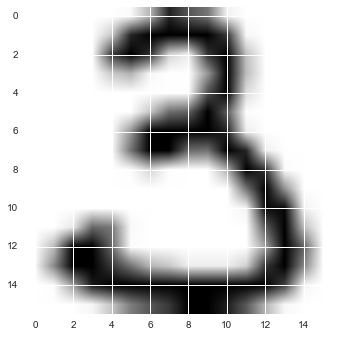

In [43]:
plt.imshow(np.reshape(train_dat.iloc[0].values, (16, 16)))

In [28]:
test_dat = pd.read_csv('./res/zip.test', header=None, sep=' ')
test_dat.rename(columns={0: 'digital'}, inplace=True)
test_dat = test_dat.query('digital == 2 or digital == 3')
test_dat.dropna(axis=1, inplace=True)

In [33]:
test_dat.set_index('digital', inplace=True)

In [34]:
test_dat.head(3)

,1,2,3,4,5,6,7,8,9,10,...,247,248,249,250,251,252,253,254,255,256
digital,,,,,,,,,,,,,,,,,,,,,
3,-1.000,-1.000,-1.000,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1,-1,-1,-1
2,-0.996,0.572,0.396,0.063,-0.506,-0.847,-1.000,-1.000,-1.000,-1.000,...,-0.668,-1.000,-1.000,-1.000,-1.000,-1.000,-1,-1,-1,-1
2,-1.000,-1.000,0.469,0.413,1.000,1.000,0.462,-0.116,-0.937,-1.000,...,1.000,1.000,1.000,0.270,-0.280,-0.855,-1,-1,-1,-1


In [68]:
def eva(conf, train_dat, test_dat):
    x_train = train_dat.values
    y_train = train_dat.index.values
    
    conf['cls'].fit(x_train, y_train)
    
    x_test = test_dat.values
    y_test = test_dat.index.values
    
    y_pred = conf['cls'].predict(x_test)
   
    accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
    print('{}, parameter: {}, accuracy: {:.4}'.format(conf['name'], conf['parameter'], accuracy))

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

configuration = [
    {'cls': LogisticRegression(), 'name': 'LogisticRegression', 'parameter': None},
    {'cls': KNeighborsClassifier(n_neighbors=1), 'name': 'KNeighborsClassifier', 'parameter': 'N=1'},
    {'cls': KNeighborsClassifier(n_neighbors=3), 'name': 'KNeighborsClassifier', 'parameter': 'N=3'},
    {'cls': KNeighborsClassifier(n_neighbors=5), 'name': 'KNeighborsClassifier', 'parameter': 'N=5'},
    {'cls': KNeighborsClassifier(n_neighbors=7), 'name': 'KNeighborsClassifier', 'parameter': 'N=7'},
    {'cls': KNeighborsClassifier(n_neighbors=15), 'name': 'KNeighborsClassifier', 'parameter': 'N=15'},
]

for conf in configuration:
    eva(conf, train_dat, test_dat)

LogisticRegression, parameter: None, accuracy: 0.9643
KNeighborsClassifier, parameter: N=1, accuracy: 0.9753
KNeighborsClassifier, parameter: N=3, accuracy: 0.9698
KNeighborsClassifier, parameter: N=5, accuracy: 0.9698
KNeighborsClassifier, parameter: N=7, accuracy: 0.967
KNeighborsClassifier, parameter: N=15, accuracy: 0.9615


### 2.9
Consider a linear regression model with $p$ parameters, fit by least squares to a set of training data $(x_1,y_1), \dotsc,(x_N,y_N)$ drawn at random from a population. Let $\hat{\beta}$  be the least squares estimate. Suppose we have some test data $(\hat{x}_1, \hat{y}_1), \dotsc,(\hat{x}_N, \hat{y}_N)$ drawn at random from the same propulation as the training data.

If $R_{tr}(\beta) = \frac{1}{N} \sum_1^N (y_i - \beta^T x_i)^2$, and $R_{te}(\beta) = \frac{1}{M} \sum_1^M (\hat{y}_i - \beta^T \hat{x}_i)^2$, prove that
$$E[R_{tr}(\hat{\beta})] \leq E[R_{te}(\hat{\beta})],$$
where the expectation are over all that is random in each expression.

#### solution
Ref: Hint from [Homework 2 - Hector Corrada Bravo](http://www.cbcb.umd.edu/~hcorrada/PracticalML/assignments/hw2.pdf) 

define: $\beta^{\ast}$ is the least squares estimate in **test data**.

1. 
As both training data and test data are picked randomly, so obviously:
$$E[R_{tr}(\hat{\beta})] = E[R_{te}(\beta^{\ast})]$$

2.  
On the other hand, because $\beta^{\ast}$ is the least squares estimate in **test data**, namely, 
$$\beta^\ast = \operatorname{argmin}_\beta \frac{1}{M} \sum_1^M (\hat{y}_i - \beta^T \hat{x}_i)^2 $$
so obviously:
$$R_{te}(\beta^\ast) = \frac{1}{M} \sum_1^M (\hat{y}_i - \left (\color{blue}{\beta^{\ast}} \right )^T \hat{x}_i)^2 \leq  \frac{1}{M} \sum_1^M (\hat{y}_i - \color{blue}{\hat{\beta}}^T \hat{x}_i)^2 = R_{te}(\hat{\beta}) $$
Thus:
$$E[R_{te}(\beta^\ast)] \leq E[R_{te}(\hat{\beta})]$$

3. 
Final, we get:
$$E[R_{tr}(\hat{\beta})] = E[R_{te}(\beta^{\ast})] \leq E[R_{te}(\hat{\beta})]$$
namely,
$$E[R_{tr}(\hat{\beta})] \leq E[R_{te}(\hat{\beta})]$$